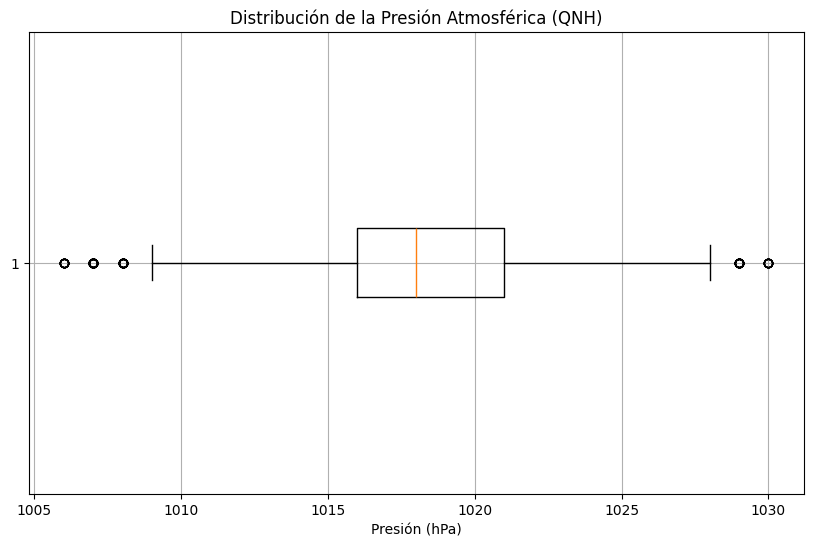

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos desde el archivo CSV
data = pd.read_csv('GCLP_All.csv')

# Filtramos los datos para asegurarnos de que solo consideramos entradas con QNH disponible
qnh_data = data[data['qnh'].notnull()]

# Creamos el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot(qnh_data['qnh'], vert=False)  # vert=False para hacer el gráfico horizontal
plt.title('Distribución de la Presión Atmosférica (QNH)')
plt.xlabel('Presión (hPa)')
plt.grid(True)

# Mostrar el gráfico
plt.show()


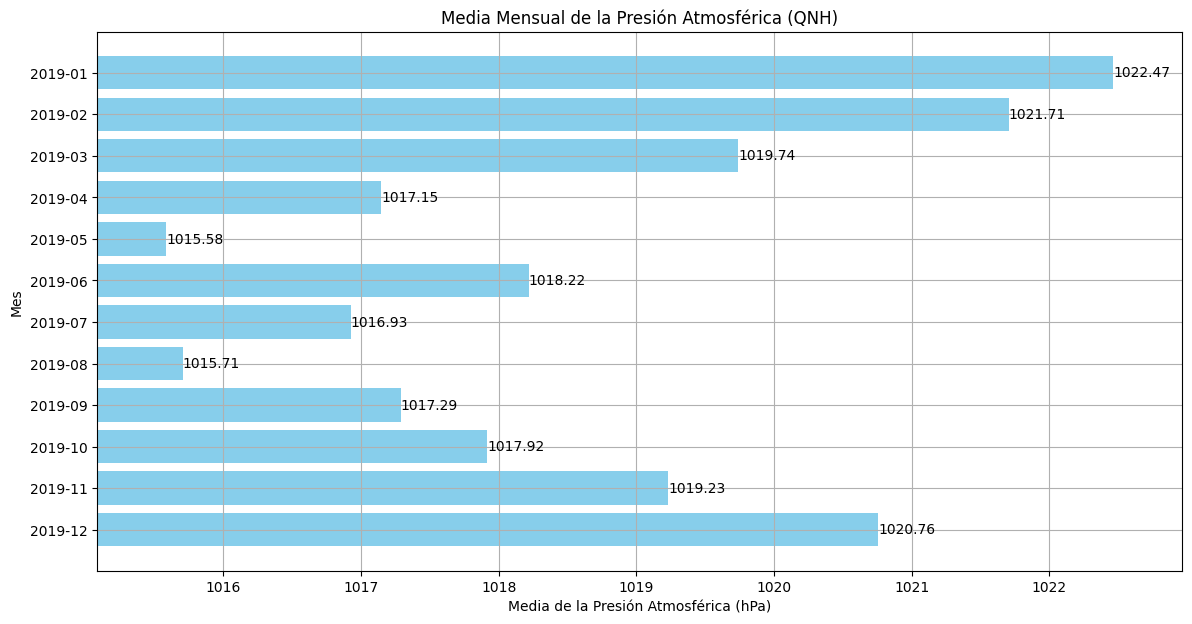

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('GCLP_All.csv')

# Convertir la columna 'dateTime' a datetime
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Extraer el año y mes en formato 'YYYY-MM'
data['year_month'] = data['dateTime'].dt.to_period('M').astype(str)  # Convertir a string directamente

# Agrupar los datos por 'year_month' y calcular la media de 'qnh'
monthly_qnh = data.groupby('year_month')['qnh'].mean().dropna()

# Crear un gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.barh(monthly_qnh.index, monthly_qnh.values, color='skyblue')
plt.xlabel('Media de la Presión Atmosférica (hPa)')
plt.ylabel('Mes')
plt.title('Media Mensual de la Presión Atmosférica (QNH)')
plt.grid(True)

# Configurar los límites del eje x para enfocar en las variaciones
plt.xlim(monthly_qnh.min() - 0.5, monthly_qnh.max() + 0.5)

# Mostrar los valores de la media en las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}",
             va='center')

# Mejorar la visualización rotando las etiquetas del eje y para que se ajusten mejor
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar los meses en orden cronológico
plt.show()
